<a href="https://colab.research.google.com/github/H0sseinR0stami/DeepLearningProjects/blob/main/Image_classification/Bee_with_pollen_detection/pollen_my_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


Model building

In [ ]:
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense , BatchNormalization , GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

CNN model

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16 ,kernel_size=(3,3),strides=(2, 2), activation = 'relu', input_shape=(224, 224, 3)))

model.add(Conv2D(filters = 32 ,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1 , activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 64)                5972032   
                                                        

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics= ['accuracy'])

Preparing Data useing Data Generator

In [ ]:
def preprocessingImages_train(path):
  """
  input : path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path , target_size=(224,224), batch_size=32, class_mode='binary')
  return image


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/train"
train_data = preprocessingImages_train(path)

Found 489 images belonging to 2 classes.


In [ ]:
def preprocessingImages_test(path):
  """
  input : path
  output: Pre processed images
  """
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path , target_size=(224,224), batch_size=32, class_mode='binary')
  return image

In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/test"
test_data = preprocessingImages_test(path)

Found 96 images belonging to 2 classes.


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/validation"
val_data = preprocessingImages_test(path)

Found 96 images belonging to 2 classes.


In [ ]:
# early stopping

es = keras.callbacks.EarlyStopping(monitor = "val_accuracy" , min_delta = 0.01 , patience = 6 , verbose =1 , mode = 'auto' )

# model check point

mc = keras.callbacks.ModelCheckpoint(monitor="val_accuracy", filepath="/content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/pollen_my_model.h6", verbose=1, save_best_only= True , mode='auto')

cd = [es,mc]


Model training


In [ ]:
hs = model.fit_generator(generator=train_data , epochs=30 , verbose=1 , validation_data= val_data , callbacks=cd )

Epoch 1/30
16/16 [==============================] - ETA: 0s - loss: 0.9538 - accuracy: 0.4744
Epoch 00001: val_accuracy improved from -inf to 0.72917, saving model to /content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/pollen_my_model.h6
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/pollen_my_model.h6/assets
16/16 [==============================] - 80s 5s/step - loss: 0.9538 - accuracy: 0.4744 - val_loss: 0.6803 - val_accuracy: 0.7292
Epoch 2/30
16/16 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.5992
Epoch 00002: val_accuracy improved from 0.72917 to 0.81250, saving model to /content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/pollen_my_model.h6
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/pollen_my_model.h6/assets
16/16 [==============================] - 10s 615ms/step - loss: 0.6712 - accuracy: 0.5992 - val_loss: 0.5708 - val_accuracy: 0.8125
Epoch 3/30
16/

Model Graphical Interpretation

In [ ]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'acc vs val-acc')

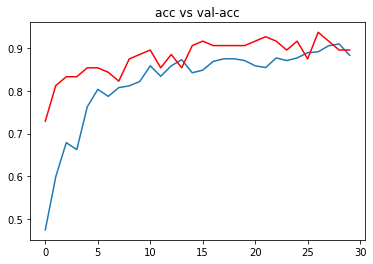

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c= 'red')

plt.title("acc vs val-acc")

Text(0.5, 1.0, 'acc vs val-acc')

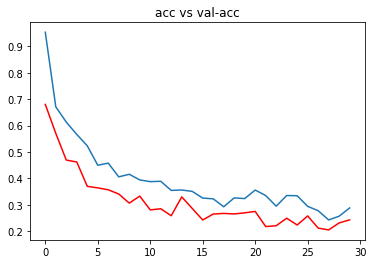

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c= 'red')

plt.title("acc vs val-acc")

Model accuracy

In [ ]:
from keras.models import load_model
model= load_model("/content/drive/MyDrive/Colab_Notebooks/project1/2.pollen/pollen_my_model.h6")

In [ ]:
acc= model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100} %")

the accuracy of our model is 90.625 %


In [ ]:
from keras.preprocessing import image

In [ ]:
train_data.class_indices

{'not_pollen_carrying': 0, 'pollen_carrying': 1}

not_pollen_carrying


<function matplotlib.pyplot.show>

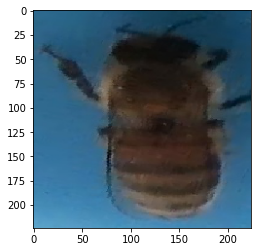

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/pollen_dataset/not_pollen_carrying/NP19587-34r.jpg'

img = image.load_img(path,target_size=(224,224))
i = image.img_to_array(img)/255
input_arr = np.expand_dims(i, axis = 0)
pred = (model.predict(input_arr)>0.5).astype("int32")[0][0]
if pred == 0:
  print("not_pollen_carrying")
else:
  print("pollen_carrying")

plt.imshow(input_arr[0])
plt.show


pollen_carrying


<function matplotlib.pyplot.show>

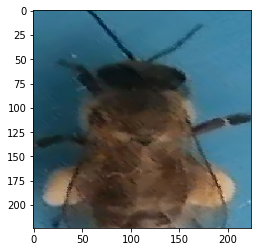

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/project1/pollen_train_data/pollen_dataset/pollen_carrying/P52248-14r.jpg'

img = image.load_img(path,target_size=(224,224))
i = image.img_to_array(img)/255
input_arr = np.expand_dims(i, axis = 0)
pred = (model.predict(input_arr)>0.5).astype("int32")[0][0]
if pred == 0:
  print("not_pollen_carrying")
else:
  print("pollen_carrying")

plt.imshow(input_arr[0])
plt.show